In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from google.colab import files, drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
os.chdir(r"/content/drive/MyDrive/cvv/")
df_train = pd.read_csv("fashion-mnist_train.csv")
df_test = pd.read_csv("fashion-mnist_test.csv")

# data preprocessing for training set

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = df_train['label']
y_train.shape

#y_train = tf.keras.utils.to_categorical(y_train, num_classes=None, dtype='float32')
y_train = to_categorical(y_train, 10)
y_train.shape

(60000, 10)

In [10]:
y_train[666]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [11]:
x_train = df_train.drop(columns='label')
x_train = np.asarray(x_train)

x_train.shape
#x_train.head()
x_train = x_train.reshape((60000, 28, 28,1))

In [12]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


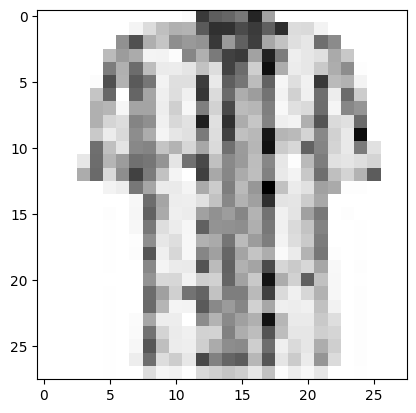

In [13]:
def see_train_image(n):
    X = x_train[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')
n = 2020
see_train_image(n)
print(y_train[n])

# Preprocess for testing set


In [14]:
y_test = df_test['label']
y_test.shape

#y_test = tf.keras.utils.to_categorical(y_test, num_classes=None, dtype='float32')
y_test = to_categorical(y_test, 10)
y_test.shape

In [16]:
df_test.shape
df_test.head()

x_test = df_test.drop(columns='label')
x_test = np.asarray(x_test)
x_test.shape
#x_test.head()
x_test = x_test.reshape((10000, 28, 28,1))

#  Import Package regarding CNN

In [17]:
pip install tensorflow

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D # the only thing new in CNN
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='mse',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_9 (Dense)             (None, 64)               

# Step 2: Goodness of function

In [49]:
model_result = model.fit(x_train, y_train, batch_size=5600, epochs=80)

Epoch 1/80
11/11 [==============================] - 2s 69ms/step - loss: 0.0874 - accuracy: 0.2756
Epoch 2/80
11/11 [==============================] - 1s 61ms/step - loss: 0.0812 - accuracy: 0.4776
Epoch 3/80
11/11 [==============================] - 1s 60ms/step - loss: 0.0761 - accuracy: 0.6149
Epoch 4/80
11/11 [==============================] - 1s 60ms/step - loss: 0.0701 - accuracy: 0.6463
Epoch 5/80
11/11 [==============================] - 1s 60ms/step - loss: 0.0634 - accuracy: 0.6883
Epoch 6/80
11/11 [==============================] - 1s 61ms/step - loss: 0.0567 - accuracy: 0.7422
Epoch 7/80
11/11 [==============================] - 1s 61ms/step - loss: 0.0503 - accuracy: 0.7664
Epoch 8/80
11/11 [==============================] - 1s 61ms/step - loss: 0.0446 - accuracy: 0.7861
Epoch 9/80
11/11 [==============================] - 1s 65ms/step - loss: 0.0395 - accuracy: 0.7977
Epoch 10/80
11/11 [==============================] - 1s 69ms/step - loss: 0.0353 - accuracy: 0.8081
Epoch 11/

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.013638008385896683
Test accuracy: 0.9077000021934509


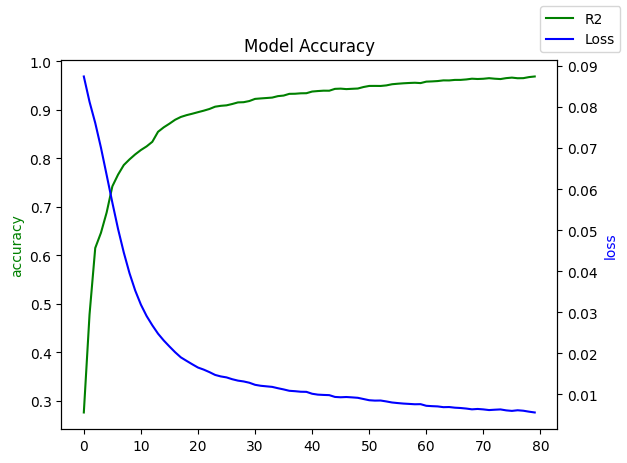

Brief view on the result of training.


In [53]:
nn_result = model_result

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(nn_result.history["accuracy"], color = "g", label = "R2")
ax2.plot(nn_result.history["loss"], color = "b", label = "Loss")

ax1.set_ylabel("accuracy", color = "g")
ax2.set_ylabel("loss", color = "b")

plt.title("Model Accuracy")
plt.xlabel("epoch")
fig.legend()
plt.show()

print("Brief view on the result of training.")